Linear Regression -> Bias^2: 0.218, Variance: 0.014, Total Error: 0.232
Polynomial Regression -> Bias^2: 0.043, Variance: 0.416, Total Error: 0.459


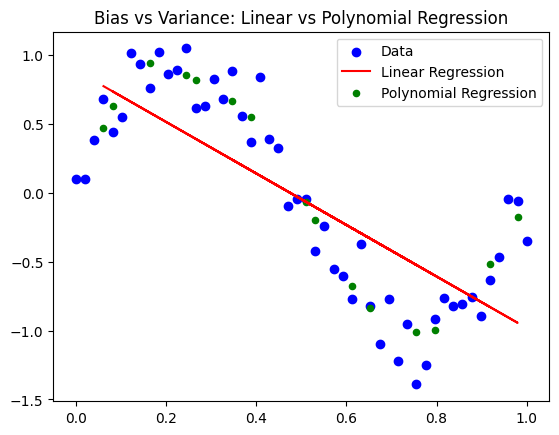

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(0, 1, 50).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.2, 50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def bias_variance_error_bootstrap(model, X_train, y_train, X_test, y_test, runs=30):
    preds = []
    n = X_train.shape[0]
    for _ in range(runs):
        idx = np.random.choice(n, n, replace=True)
        X_sample = X_train[idx]
        y_sample = y_train[idx]
        preds.append(model.fit(X_sample, y_sample).predict(X_test))

    preds = np.array(preds)
    y_pred_mean = preds.mean(axis=0)

    bias_sq = ((y_test - y_pred_mean)**2).mean()
    variance = preds.var(axis=0).mean()
    total_error = bias_sq + variance

    return bias_sq, variance, total_error

lin_model = LinearRegression()
b_lin, v_lin, e_lin = bias_variance_error_bootstrap(lin_model, X_train, y_train, X_test, y_test)
print(f"Linear Regression -> Bias^2: {b_lin:.3f}, Variance: {v_lin:.3f}, Total Error: {e_lin:.3f}")

poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
b_poly, v_poly, e_poly = bias_variance_error_bootstrap(poly_model, X_train_poly, y_train, X_test_poly, y_test)
print(f"Polynomial Regression -> Bias^2: {b_poly:.3f}, Variance: {v_poly:.3f}, Total Error: {e_poly:.3f}")

plt.scatter(X, y, label="Data", color='blue')
plt.plot(X_test, lin_model.fit(X_train, y_train).predict(X_test), color='red', label="Linear Regression")
plt.scatter(X_test, poly_model.fit(X_train_poly, y_train).predict(X_test_poly), color='green', label="Polynomial Regression", s=20)
plt.title("Bias vs Variance: Linear vs Polynomial Regression")
plt.legend()
plt.show()
